# 1. Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 2. Dataset

In [2]:
M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])
T = np.array([3800, 4400, 5800, 6400, 6900, 7400, 7900, 8300, 8800, 9200])
L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])

# 3. Visualización

La luminosidad crece de forma no lineal con la masa. La temperatura introduce variación adicional, lo que justifica usar términos polinomiales y de interacción.


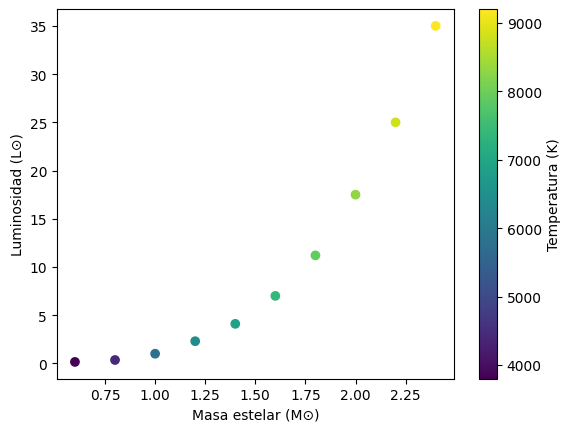

In [3]:
plt.scatter(M, L, c=T)
plt.colorbar(label="Temperatura (K)")
plt.xlabel("Masa estelar (M⊙)")
plt.ylabel("Luminosidad (L⊙)")
plt.show()

# 4. Feature engineering

In [ ]:
def build_X(M, T):
    return np.column_stack((M, T, M**2, M*T))

X = build_X(M, T)

# 5. Costo y gradientes

In [5]:
def compute_cost(X, L, w, b):
    m = X.shape[0]
    err = X @ w + b - L
    return np.sum(err**2) / (2*m)

def compute_gradient(X, L, w, b):
    m = X.shape[0]
    err = X @ w + b - L
    dj_dw = (X.T @ err) / m
    dj_db = np.sum(err) / m
    return dj_dw, dj_db


# 6. Gradient Descent

In [6]:
def gradient_descent(X, L, w, b, alpha, iters):
    J_hist = []
    for _ in range(iters):
        dj_dw, dj_db = compute_gradient(X, L, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        J_hist.append(compute_cost(X, L, w, b))
    return w, b, J_hist


# 7. Entrenamiento y convergencia

El costo disminuye de forma estable, aunque lentamente debido a las distintas escalas entre masa y temperatura.

In [20]:
w_init = np.zeros(X.shape[1])
b_init = 0
alpha = 1e-12
iters = 2000

w, b, J_hist = gradient_descent(X, L, w_init, b_init, alpha, iters)

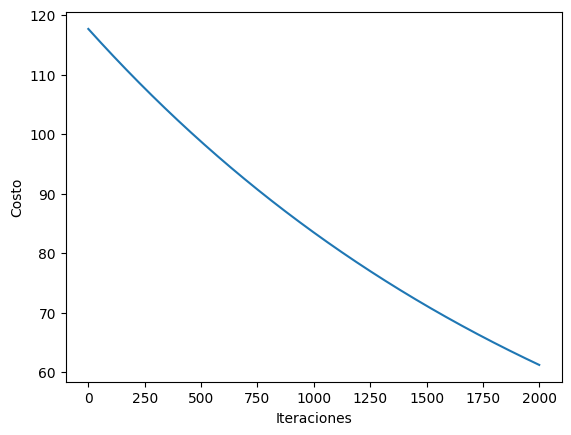

In [18]:
plt.plot(J_hist)
plt.xlabel("Iteraciones")
plt.ylabel("Costo")
plt.show()

# 8. Experimentacion

Al agregar términos no lineales y de interacción, el costo final disminuye, indicando un mejor ajuste del modelo.


In [9]:
X1 = np.column_stack((M, T))
X2 = np.column_stack((M, T, M**2))
X3 = np.column_stack((M, T, M**2, M*T))

In [10]:
def train_model(X, L):
    w = np.zeros(X.shape[1])
    b = 0
    w, b, J = gradient_descent(X, L, w, b, alpha, iters)
    return w, b, J[-1]

In [11]:
w1, b1, J1 = train_model(X1, L)
w2, b2, J2 = train_model(X2, L)
w3, b3, J3 = train_model(X3, L)

print(J1, J2, J3)

103.71956453872035 103.719560923908 61.23190141436096


# 9. Predicho vs real

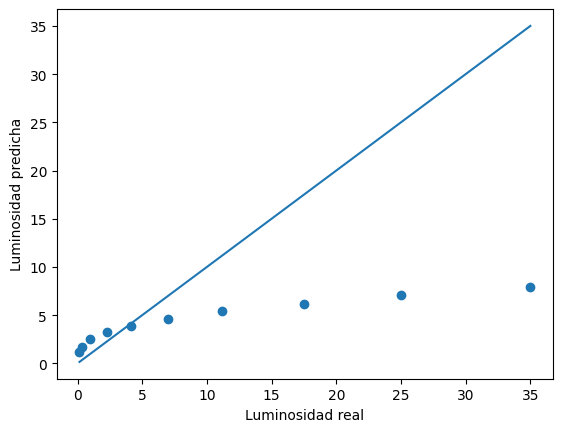

In [26]:
L_hat = X3 @ w3 + b3

plt.scatter(L, L_hat)
plt.plot([L.min(), L.max()], [L.min(), L.max()])
plt.xlabel("Luminosidad real")
plt.ylabel("Luminosidad predicha")
plt.show()

# 10. Costo vs interacción

El mínimo bien definido indica que el término de interacción M*T es relevante para el modelo.

In [13]:
vals = np.linspace(w3[3]-5, w3[3]+5, 100)
costs = []

for v in vals:
    w_tmp = w3.copy()
    w_tmp[3] = v
    costs.append(compute_cost(X3, L, w_tmp, b3))

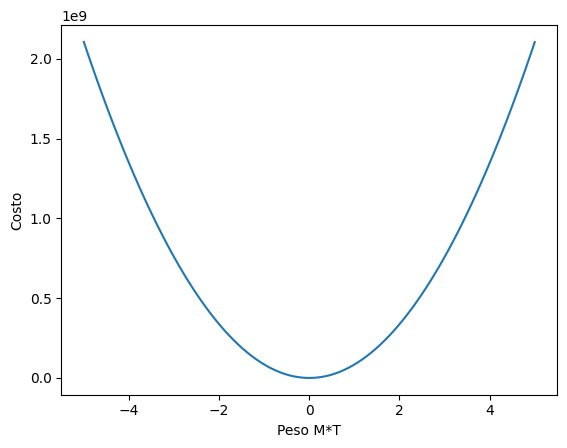

In [14]:
plt.plot(vals, costs)
plt.xlabel("Peso M*T")
plt.ylabel("Costo")
plt.show()

# 11. Inference demo

La predicción es coherente con los valores de luminosidad observados para estrellas de masa similar.


In [15]:
M_new = 1.3
T_new = 6600

X_new = np.array([M_new, T_new, M_new**2, M_new*T_new])
L_pred = X_new @ w3 + b3

L_pred

3.5196888524843466

# 12. Conclucion
El uso de términos polinomiales e interacciones permite capturar mejor la relación no lineal entre las variables físicas, superando las limitaciones del modelo lineal simple.
